In [1]:
import os,sys
import numpy as np
import copy
import pandas as pd

codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import nsd_utils, default_paths
# import coco_utils
import PIL
import matplotlib.pyplot as plt
from matplotlib import cm
from model_fitting import initialize_fitting
from plotting_and_analysis import plot_utils 

In [2]:
subject = 1;
subject_df = nsd_utils.get_subj_df(subject)
fn2load = os.path.join(default_paths.sketch_token_feat_path, 'PCA','S%d_PCA.npy'%subject)
pc_result = np.load(fn2load, allow_pickle=True).item()

scores_each_prf = pc_result['scores']
wts_each_prf = pc_result['wts']
ev_each_prf = pc_result['ev']

In [3]:
prf_model_index = 866
coco_labels_fn = os.path.join(default_paths.stim_labels_root, 'S%d_within_prf'%subject, \
                              'S%d_cocolabs_binary_prf%d.csv'%(subject, prf_model_index))
print('Reading labels from %s...'%coco_labels_fn)
coco_df = pd.read_csv(coco_labels_fn, index_col=0)

Reading labels from /user_data/mmhender/nsd_stimuli/labels/S1_within_prf/S1_cocolabs_binary_prf866.csv...


In [4]:
# Params for the spatial aspect of the model (possible pRFs)
aperture_rf_range = 1.1
aperture, models = initialize_fitting.get_prf_models(aperture_rf_range=aperture_rf_range)    
n_prfs = models.shape[0]

most extreme RF positions:
[-0.55 -0.55  0.04]
[0.55       0.55       0.40000001]


543254

Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255
['animal', 'bird', 'has_animate']


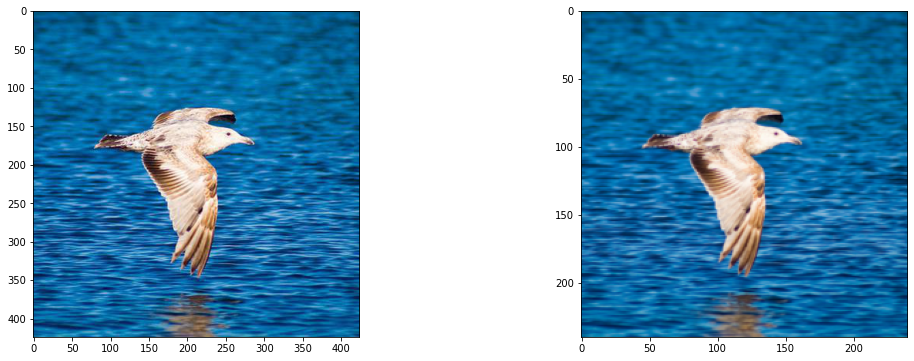

In [5]:
# Double check that the coco labels are correct
imageind = 106
cocoid = np.array(subject_df['cocoId'])[imageind]
print(cocoid)
cocoim = '/lab_data/tarrlab/common/datasets/NSD_images/images/%d.jpg'%cocoid
im = PIL.Image.open(cocoim)

plt.figure(figsize=(18,6));
plt.subplot(1,2,1)
plt.imshow(im)

ims = nsd_utils.get_image_data(subject)
plt.subplot(1,2,2)
plt.imshow(np.moveaxis(ims[imageind,:,:,:],[0,1,2],[2,0,1]))

print([kk for kk in list(coco_df.keys()) if coco_df[kk].loc[imageind]==1.0])

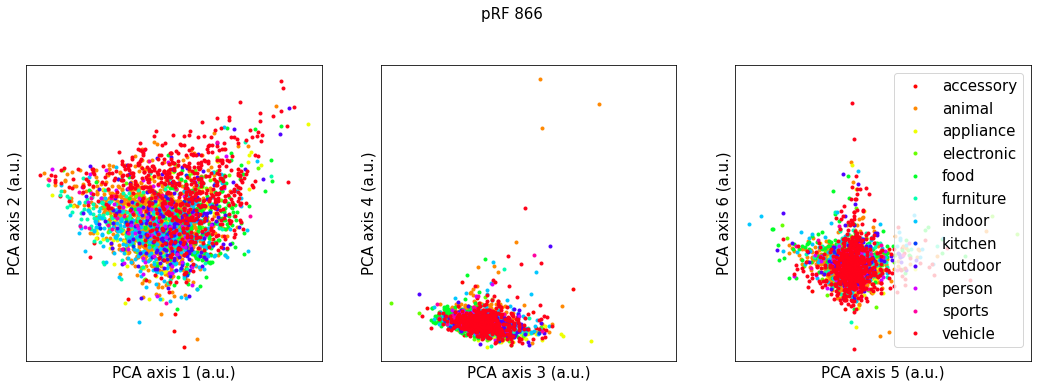

In [6]:
supcat_labels = np.array(coco_df)[:,0:12]
supcat_names = list(coco_df.keys())[0:12]

labels = [np.where(supcat_labels[ii,:])[0] for ii in range(supcat_labels.shape[0])]
labels = np.array([ll[0] if len(ll)>0 else -1 for ll in labels])
ims_to_use = np.sum(supcat_labels, axis=1)==1

scores = scores_each_prf[prf_model_index][ims_to_use,:]
labels_actual = labels[ims_to_use]

plot_utils.set_all_font_sizes(15)
plt.figure(figsize=(18,6));

ax2plot_list = [[0,1], [2,3], [4,5]]

colors = cm.hsv(np.linspace(0,1,len(supcat_names)))

for ai, ax2plot in enumerate(ax2plot_list):
    plt.subplot(1,3,ai+1)
    
    lh=[]
    for sc, scname in enumerate(supcat_names):

        ims_in_supcat = labels_actual==sc
        meanvals = np.mean(scores[ims_in_supcat,:], axis=0)
        semvals = np.std(scores[ims_in_supcat,:], axis=0)/np.sqrt(np.sum(ims_in_supcat))

        h=plt.plot(scores[ims_in_supcat,ax2plot[0]], \
                 scores[ims_in_supcat,ax2plot[1]],'.',alpha=1,color=colors[sc])
        lh.append(h[0])
        
#         h, = plt.plot(meanvals[ax2plot[0]], meanvals[ax2plot[1]],'.',markersize=10,color=colors[sc])
#         plt.errorbar(x = meanvals[ax2plot[0]], y = meanvals[ax2plot[1]], \
#                      yerr = semvals[ax2plot[1]], xerr = semvals[ax2plot[0]], color=colors[sc])
#         lh.append(h)

    if ai==2:
        plt.legend(handles=lh,labels=supcat_names)
    
    plt.axis('square')
    plt.xlabel('PCA axis %d (a.u.)'%(ax2plot[0]+1))
    plt.ylabel('PCA axis %d (a.u.)'%(ax2plot[1]+1))

    plt.xticks([])
    plt.yticks([])
    
plt.suptitle('pRF %d'%prf_model_index);

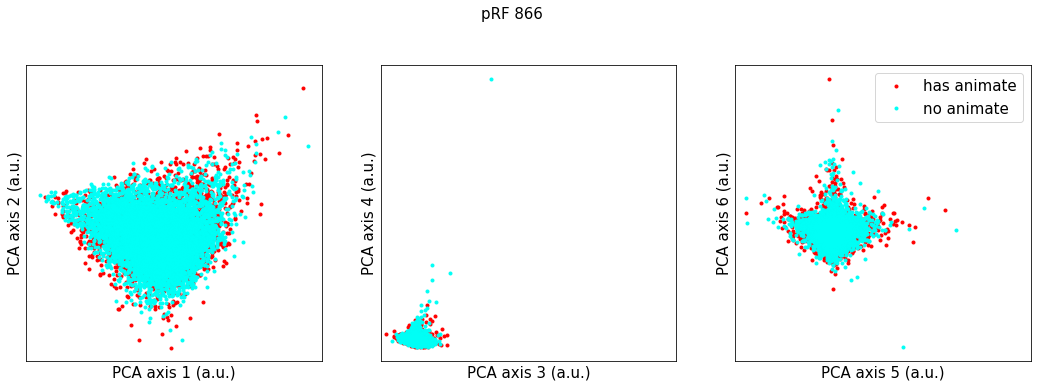

In [17]:
animacy_labels = np.array(coco_df['has_animate'])
# supcat_names = list(coco_df.keys())[0:12]
supcat_names = ['has animate','no animate']

labels = animacy_labels
ims_to_use = np.ones(np.shape(labels))==1

scores = scores_each_prf[prf_model_index][ims_to_use,:]
labels_actual = labels[ims_to_use]

plot_utils.set_all_font_sizes(15)
plt.figure(figsize=(18,6));

ax2plot_list = [[0,1], [2,3], [4,5]]

colors = cm.hsv(np.linspace(0,1,len(supcat_names)+1))

for ai, ax2plot in enumerate(ax2plot_list):
    plt.subplot(1,3,ai+1)
    
    lh=[]
    for sc, scname in enumerate(supcat_names):

        ims_in_supcat = labels_actual==sc
        meanvals = np.mean(scores[ims_in_supcat,:], axis=0)
        semvals = np.std(scores[ims_in_supcat,:], axis=0)/np.sqrt(np.sum(ims_in_supcat))

        h=plt.plot(scores[ims_in_supcat,ax2plot[0]], \
                 scores[ims_in_supcat,ax2plot[1]],'.',alpha=1,color=colors[sc])

#         h, = plt.plot(meanvals[ax2plot[0]], meanvals[ax2plot[1]],'.',markersize=10,color=colors[sc])
#         plt.errorbar(x = meanvals[ax2plot[0]], y = meanvals[ax2plot[1]], \
#                      yerr = semvals[ax2plot[1]], xerr = semvals[ax2plot[0]], color=colors[sc])
        lh.append(h[0])

    if ai==2:
        plt.legend(handles=lh,labels=supcat_names)
    
    plt.axis('square')
    plt.xlabel('PCA axis %d (a.u.)'%(ax2plot[0]+1))
    plt.ylabel('PCA axis %d (a.u.)'%(ax2plot[1]+1))

    plt.xticks([])
    plt.yticks([])
    
plt.suptitle('pRF %d'%prf_model_index);

Text(0.5, 0.98, 'PCs variance explained from sketch tokens model, all features\n')

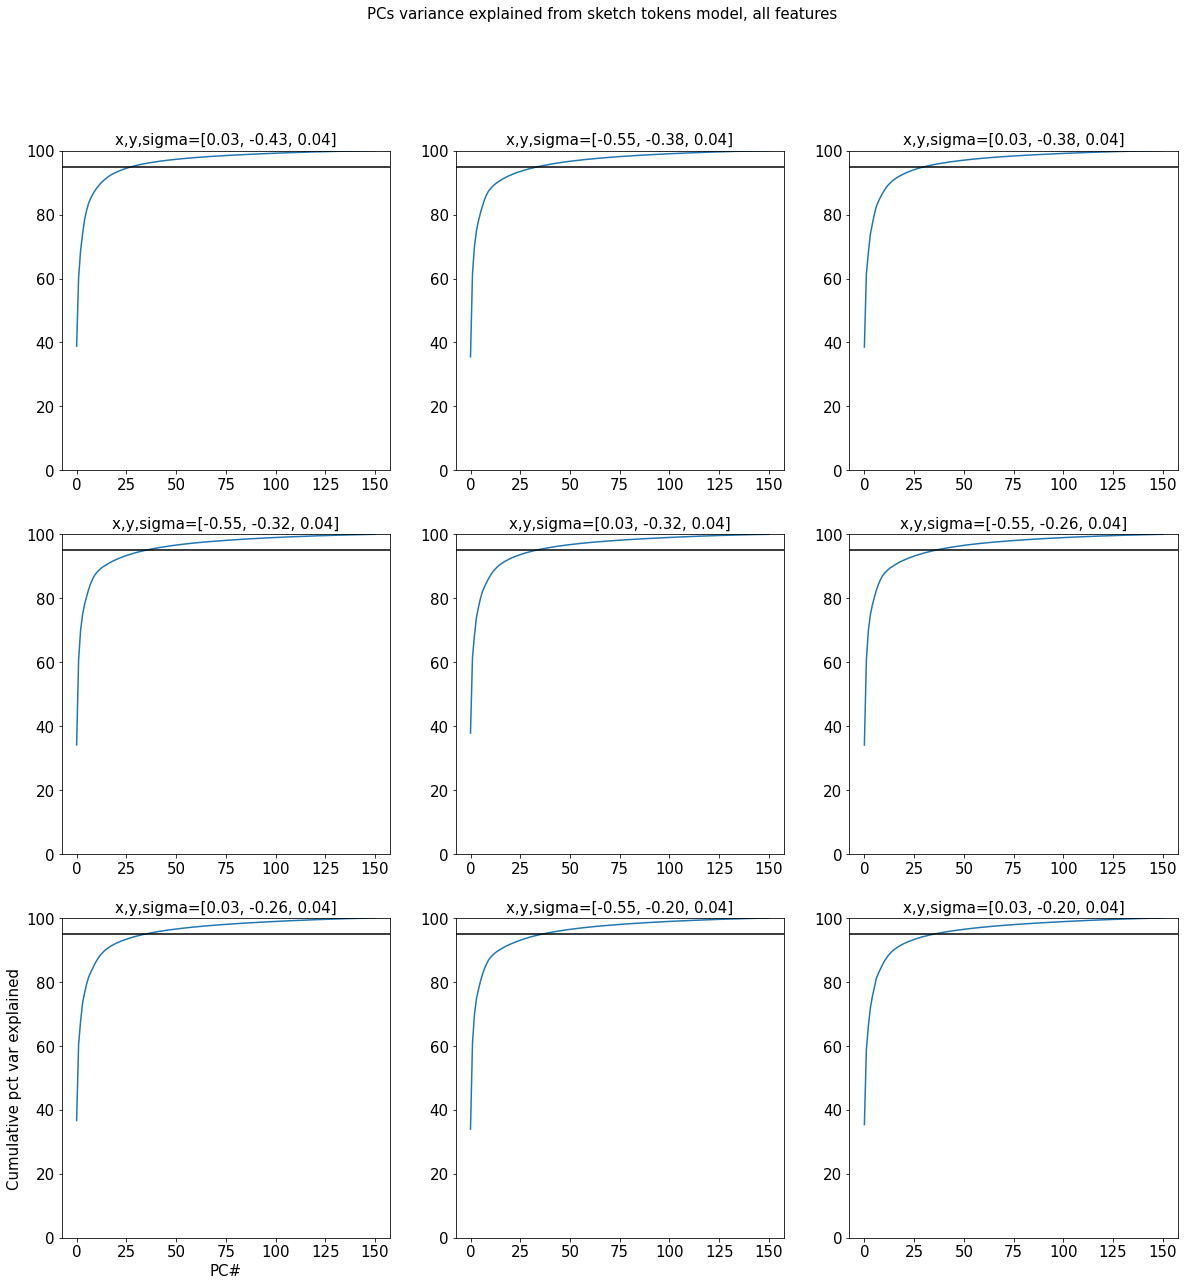

In [16]:
plot_utils.set_all_font_sizes(15)
plt.figure(figsize=(20,20));

# pcs2plot = [0,1]
# colors = cm.Set1(np.linspace(0,1,len(supcat_names)))

mm2plot = np.arange(50,140,10)
npx = int(np.ceil(np.sqrt(len(mm2plot))))
npy = int(np.ceil(len(mm2plot)/npx))

for mi, mm in enumerate(mm2plot):
    ev = ev_each_prf[mm]
    plt.subplot(npx,npy,mi+1)
    
    plt.plot(np.cumsum(ev))
    
    plt.axhline(95,color='k')
    
    if mi==len(mm2plot)-npx:
        plt.xlabel('PC#')
        plt.ylabel('Cumulative pct var explained')
    
#     plt.xticks([])
#     plt.yticks([])
    plt.ylim([0,100])
    
    plt.title('x,y,sigma=[%.2f, %.2f, %.2f]'
          %(models[mm,0], models[mm,1], models[mm,2]));
    
plt.suptitle('PCs variance explained from sketch tokens model, all features\n')
    

Text(0.5, 0.98, 'PCs wts from sketch tokens model, all features\n')

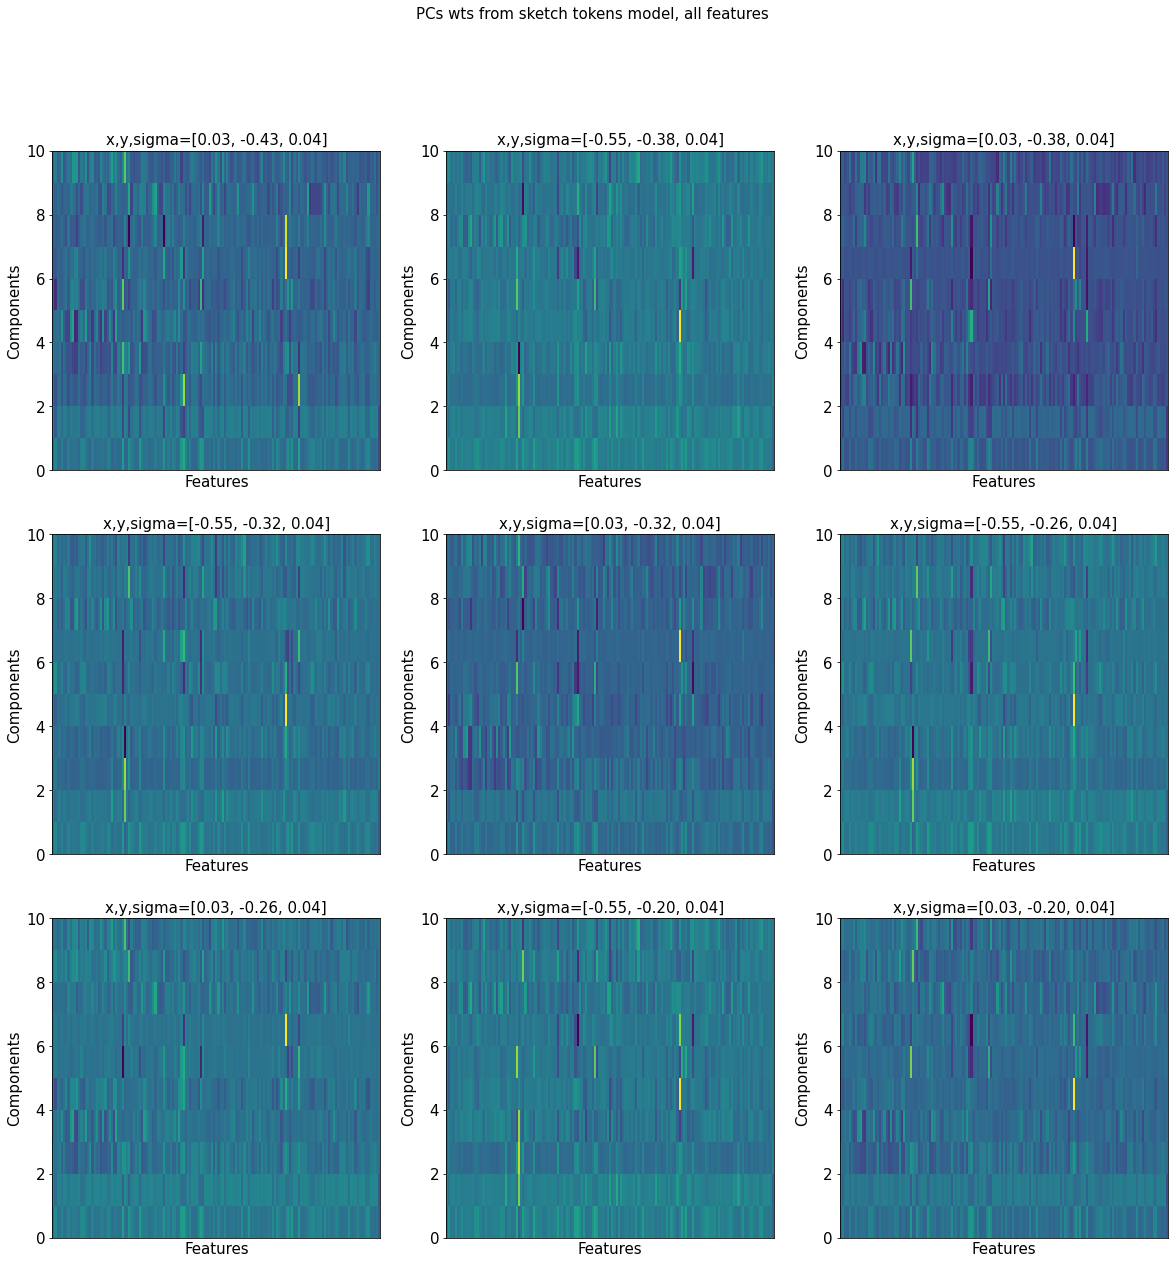

In [9]:
plot_utils.set_all_font_sizes(15)
plt.figure(figsize=(20,20));

# pcs2plot = [0,1]
# colors = cm.Set1(np.linspace(0,1,len(supcat_names)))

mm2plot = np.arange(50,140,10)
npx = int(np.ceil(np.sqrt(len(mm2plot))))
npy = int(np.ceil(len(mm2plot)/npx))

for mi, mm in enumerate(mm2plot):
    wts = wts_each_prf[mm]
    # wts is components x features
    plt.subplot(npx,npy,mi+1)
    
    plt.pcolormesh(wts[0:10,:])
    
#     if mi==len(mm2plot)-npx:
#         plt.xlabel('PC %d (a.u.)'%(pcs2plot[0]+1))
#         plt.ylabel('PC %d (a.u.)'%(pcs2plot[1]+1))
    
    plt.xticks([])
#     plt.yticks([])
    
    plt.ylabel('Components')
    plt.xlabel('Features')
    
    plt.title('x,y,sigma=[%.2f, %.2f, %.2f]'
          %(models[mm,0], models[mm,1], models[mm,2]));
    
plt.suptitle('PCs wts from sketch tokens model, all features\n')
    

Text(0.5, 0.98, 'Comparing PC weights across models: colors are pRF models')

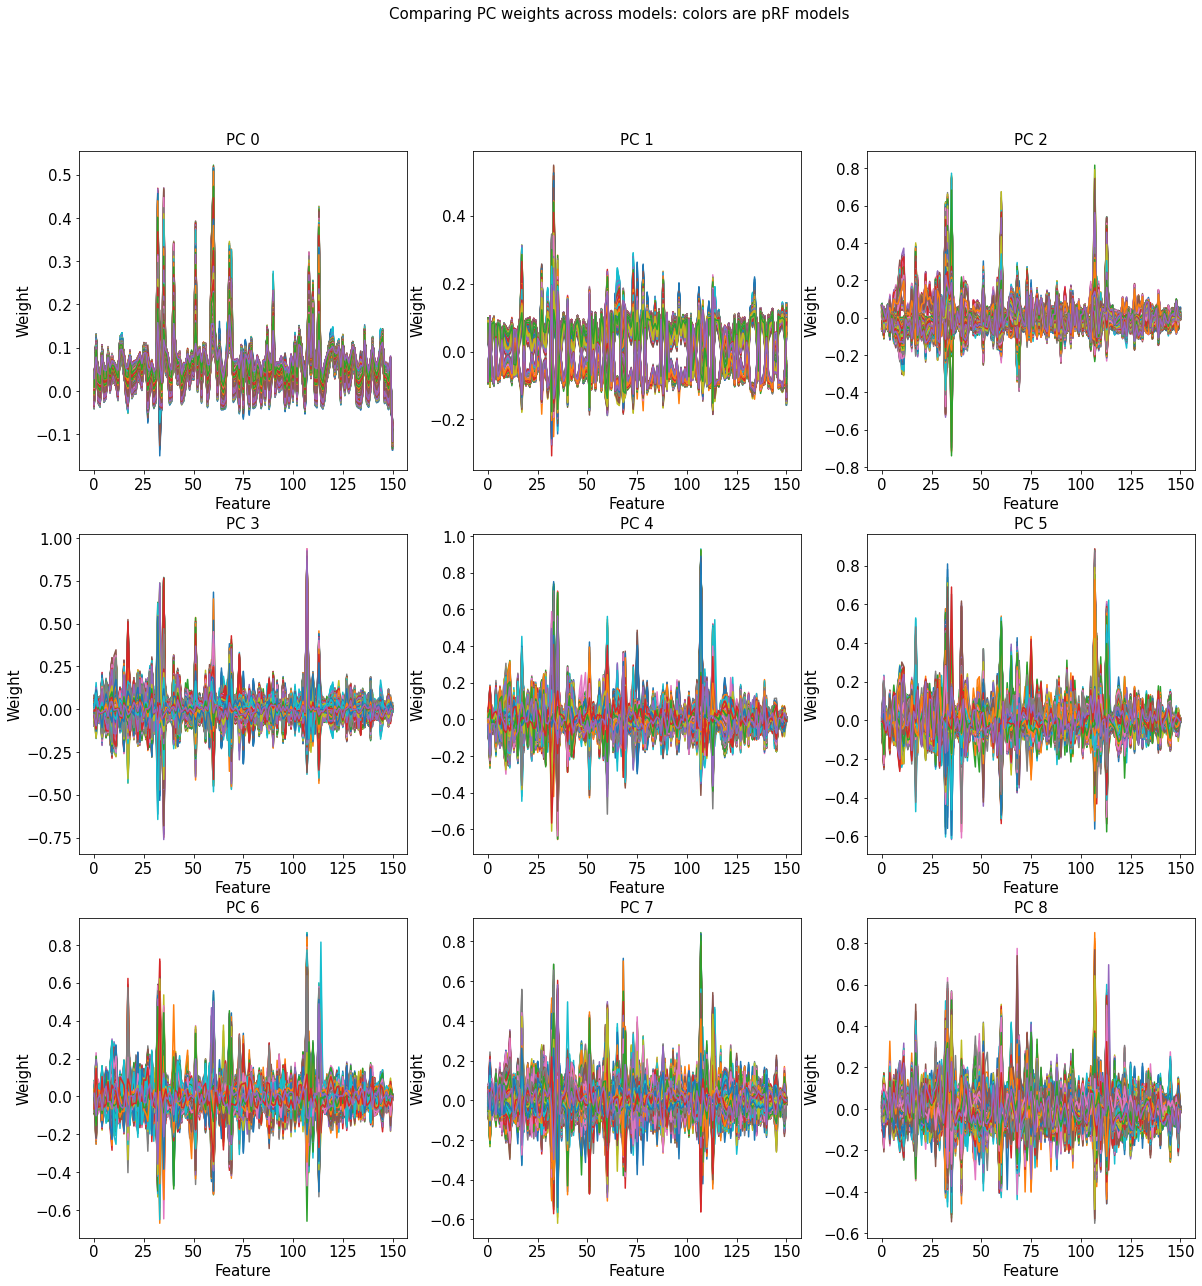

In [10]:
plt.figure(figsize=(20,20));

npx=3;npy=3
for pc in range(9):
    plt.subplot(npx,npy,pc+1)
    w2plot = np.array([wts_each_prf[mm][pc,:] for mm in range(n_prfs)])
    plt.plot(w2plot.T);
    plt.title('PC %d'%pc)
    plt.xlabel('Feature')
    plt.ylabel('Weight')
    
plt.suptitle('Comparing PC weights across models: colors are pRF models')

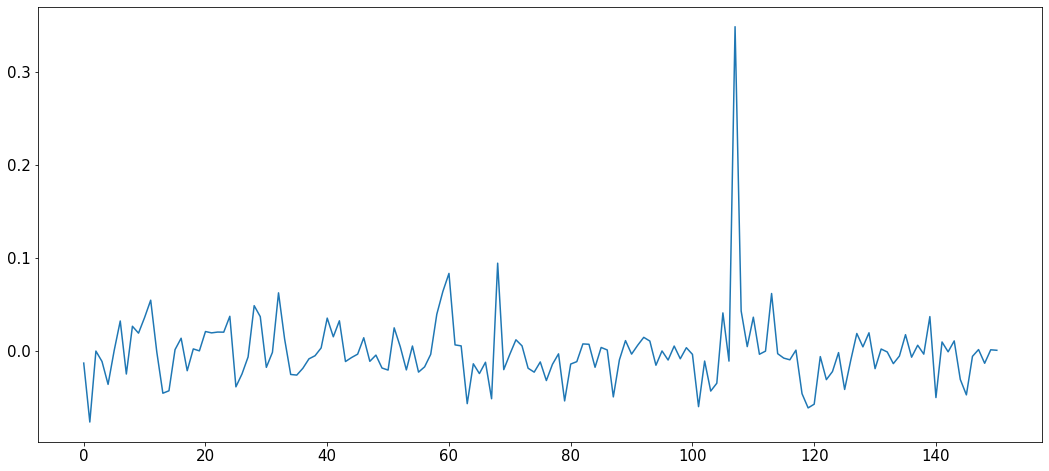

In [11]:
pc=4
w = np.array([wts_each_prf[mm][pc,:] for mm in range(n_prfs)])
wmean = np.mean(w, axis=0)

plt.figure(figsize=(18,8));
plt.plot(wmean)

In [12]:
from scipy.io import loadmat
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
clusters = clust['clusters']['clusters'][0][0]

Text(0.5, 0.98, 'Sketch token features with lowest weights for PC 0')

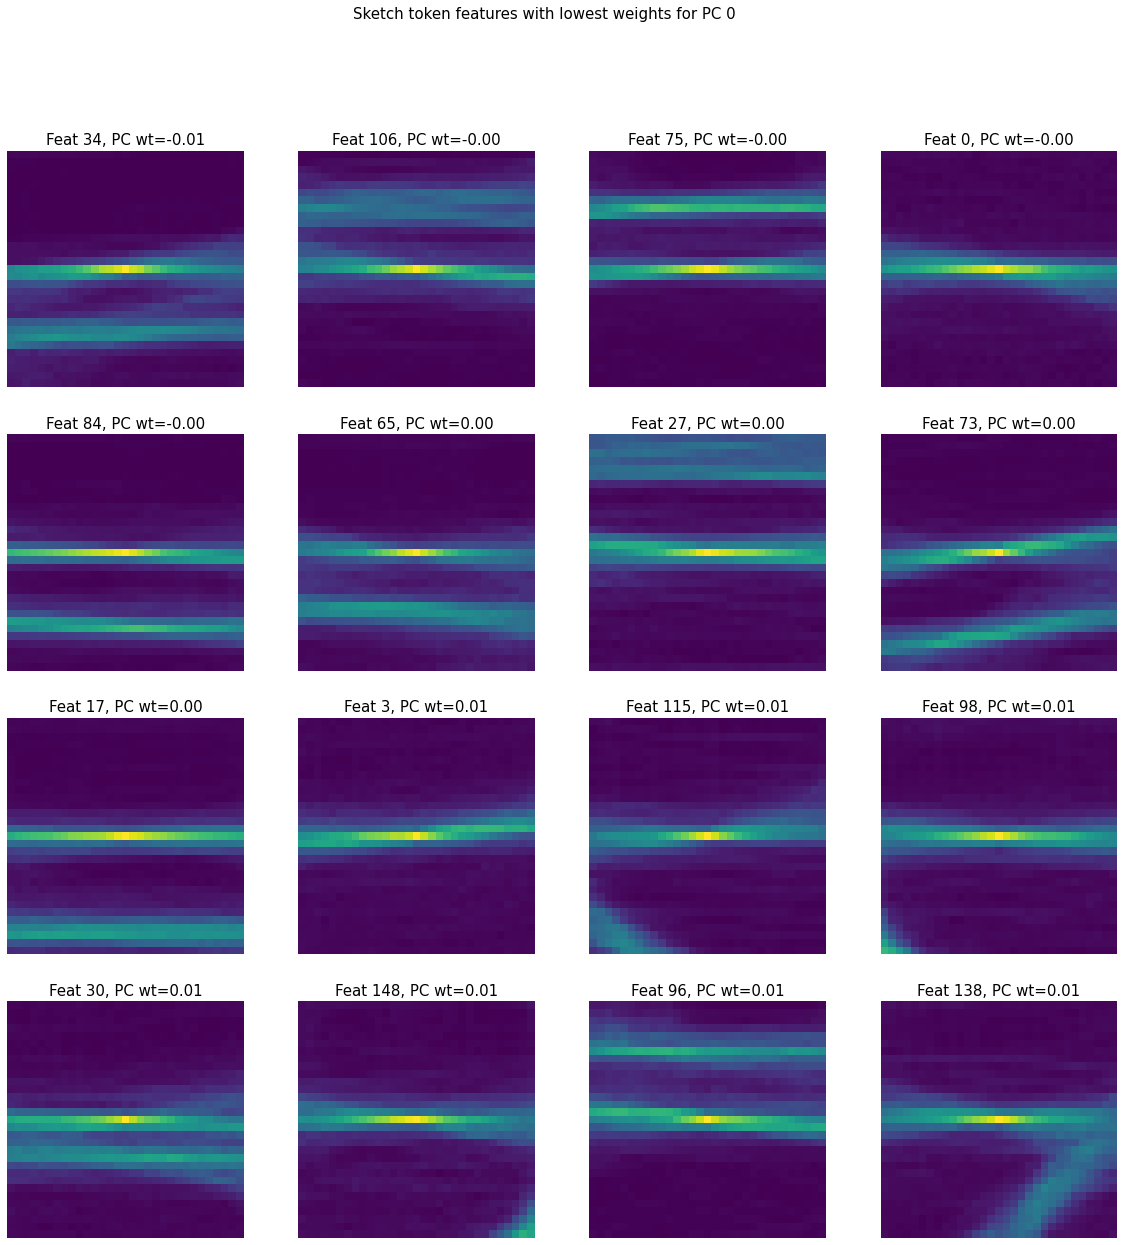

In [14]:
nclusters = clusters.shape[2]
n2plot = 16
# clusters2plot = np.random.choice(np.arange(0,nclusters), n2plot,replace=False)
pc=0
w = np.array([wts_each_prf[mm][pc,:] for mm in range(n_prfs)])
wmean = np.mean(w, axis=0)[0:150]

# clusters2plot = np.flip(np.argsort(wmean))[0:n2plot]
clusters2plot = np.argsort(wmean)[0:n2plot]

plt.figure(figsize=(20,20))
for ci,cc in enumerate(clusters2plot):
    
    plt.subplot(4,4,ci+1)
    plt.pcolormesh(clusters[:,:,cc])
    plt.axis('square')
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.title('Feat %d, PC wt=%.2f'%(cc, wmean[cc]))
    
plt.suptitle('Sketch token features with lowest weights for PC %d'%pc)

Text(0.5, 0.98, 'Sketch token features with highest weights for PC 0')

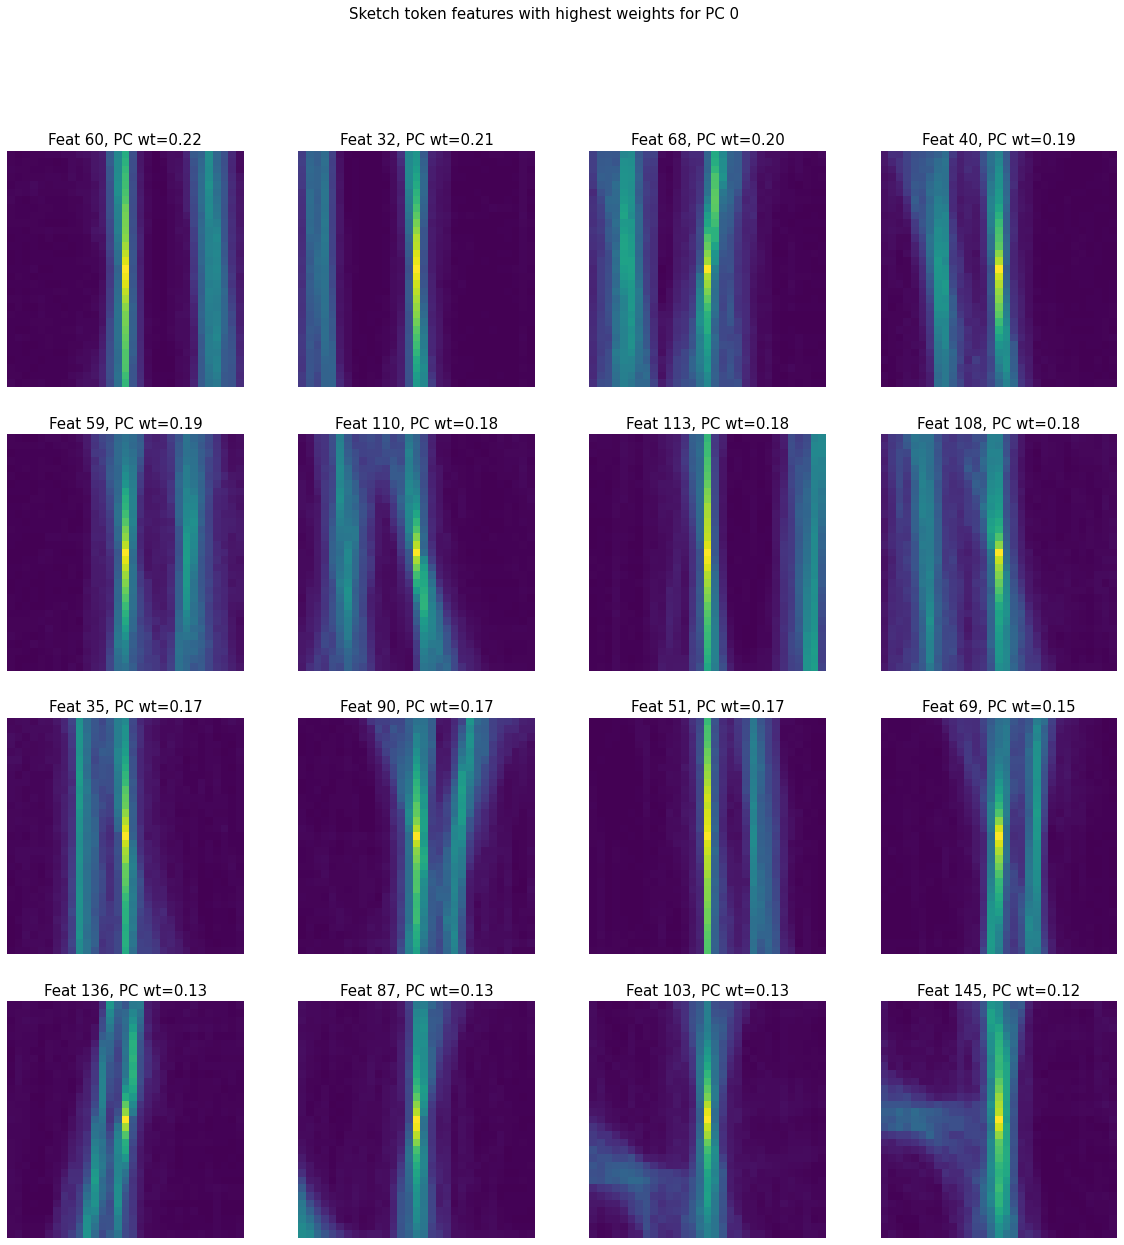

In [15]:
nclusters = clusters.shape[2]
n2plot = 16
# clusters2plot = np.random.choice(np.arange(0,nclusters), n2plot,replace=False)
pc=0
w = np.array([wts_each_prf[mm][pc,:] for mm in range(n_prfs)])
wmean = np.mean(w, axis=0)[0:150]

clusters2plot = np.flip(np.argsort(wmean))[0:n2plot]
# clusters2plot = np.argsort(wmean)[0:n2plot]

plt.figure(figsize=(20,20))
for ci,cc in enumerate(clusters2plot):
    
    plt.subplot(4,4,ci+1)
    plt.pcolormesh(clusters[:,:,cc])
    plt.axis('square')
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.title('Feat %d, PC wt=%.2f'%(cc, wmean[cc]))
    
plt.suptitle('Sketch token features with highest weights for PC %d'%pc)